In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


✅ Model saved as iris_model.pkl
✅ Encoder saved as iris_encoder.pkl
✅ Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



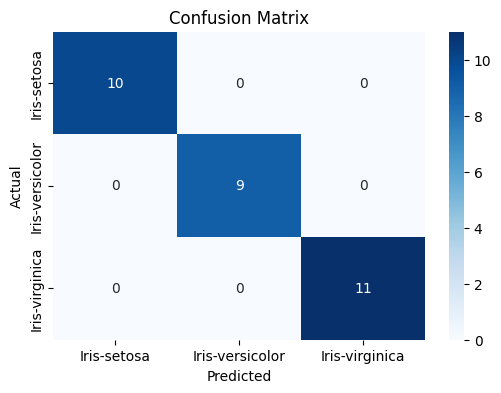

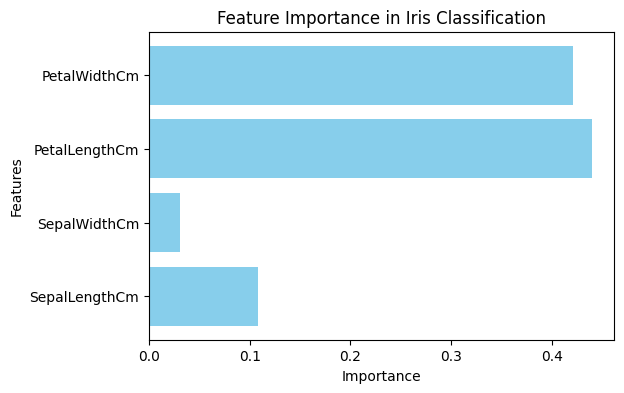

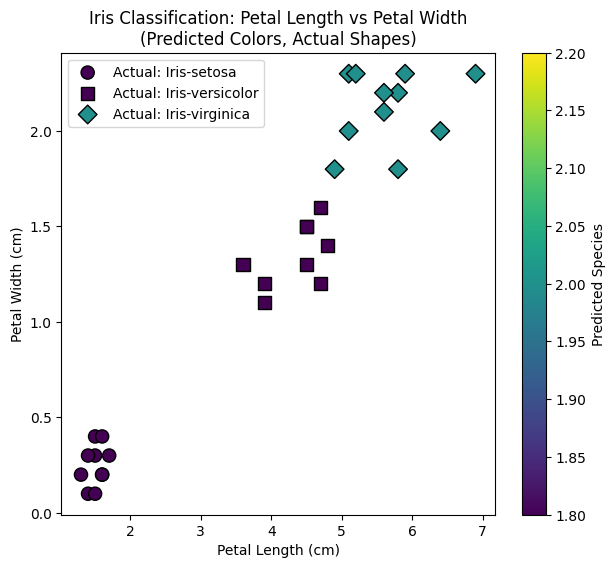

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


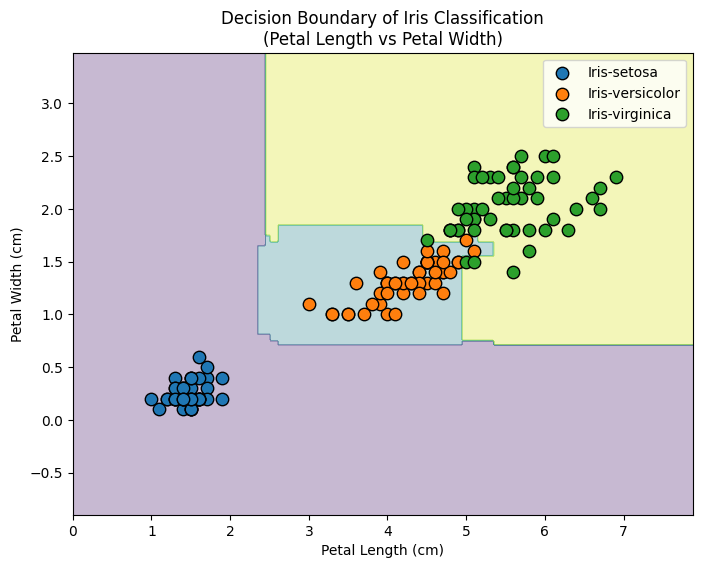

In [6]:
# Iris Flower Classification (Modular Code with Visualizations)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


# -------------------------
# Load and preprocess dataset
# -------------------------
def load_data(file_path):
    iris = pd.read_csv(file_path)
    iris = iris.drop("Id", axis=1)  # Drop useless column
    X = iris.drop("Species", axis=1)
    y = iris["Species"]

    le = LabelEncoder()
    y = le.fit_transform(y)

    return X, y, le, iris


# -------------------------
# Train model
# -------------------------
def train_model(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    model = RandomForestClassifier(n_estimators=100, random_state=random_state)
    model.fit(X_train, y_train)
    return model, X_train, X_test, y_train, y_test


# -------------------------
# Evaluate model
# -------------------------
def evaluate_model(model, X_test, y_test, le):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print("✅ Accuracy:", acc)
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return y_pred


# -------------------------
# Feature importance plot
# -------------------------
def plot_feature_importance(model, X):
    importances = model.feature_importances_
    features = X.columns
    plt.figure(figsize=(6, 4))
    plt.barh(features, importances, color="skyblue")
    plt.title("Feature Importance in Iris Classification")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()


# -------------------------
# Scatter plot (Predicted vs Actual)
# -------------------------
def plot_scatter(X_test, y_test, y_pred, le):
    plt.figure(figsize=(7, 6))
    markers = ["o", "s", "D"]  # circle, square, diamond

    for actual_class in range(len(le.classes_)):
        idx = y_test == actual_class
        plt.scatter(X_test["PetalLengthCm"][idx],
                    X_test["PetalWidthCm"][idx],
                    c=y_pred[idx], cmap="viridis",
                    marker=markers[actual_class],
                    edgecolor="k", s=90, label=f"Actual: {le.classes_[actual_class]}")

    plt.title("Iris Classification: Petal Length vs Petal Width\n(Predicted Colors, Actual Shapes)")
    plt.xlabel("Petal Length (cm)")
    plt.ylabel("Petal Width (cm)")
    plt.legend()
    plt.colorbar(label="Predicted Species")
    plt.show()


# -------------------------
# Decision Boundary plot
# -------------------------
def plot_decision_boundary(iris, le):
    X_boundary = iris[["PetalLengthCm", "PetalWidthCm"]]
    y_boundary = le.fit_transform(iris["Species"])

    model_boundary = RandomForestClassifier(n_estimators=100, random_state=42)
    model_boundary.fit(X_boundary, y_boundary)

    # Mesh grid
    x_min, x_max = X_boundary["PetalLengthCm"].min() - 1, X_boundary["PetalLengthCm"].max() + 1
    y_min, y_max = X_boundary["PetalWidthCm"].min() - 1, X_boundary["PetalWidthCm"].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model_boundary.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot regions + data points
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="viridis")

    for i, class_name in enumerate(le.classes_):
        plt.scatter(X_boundary["PetalLengthCm"][y_boundary == i],
                    X_boundary["PetalWidthCm"][y_boundary == i],
                    label=class_name, edgecolor="k", s=80)

    plt.title("Decision Boundary of Iris Classification\n(Petal Length vs Petal Width)")
    plt.xlabel("Petal Length (cm)")
    plt.ylabel("Petal Width (cm)")
    plt.legend()
    plt.show()


# -------------------------
# Main function
# -------------------------
def main():
    file_path = "/content/drive/MyDrive/Iris.csv"

    # Load data
    X, y, le, iris = load_data(file_path)

    # Train model
    model, X_train, X_test, y_train, y_test = train_model(X, y)

    # Save trained model and encoder
    joblib.dump(model, "iris_model.pkl")
    joblib.dump(le, "iris_encoder.pkl") # Save the encoder
    print("✅ Model saved as iris_model.pkl")
    print("✅ Encoder saved as iris_encoder.pkl")

    # Evaluate
    y_pred = evaluate_model(model, X_test, y_test, le)

    # Feature importance
    plot_feature_importance(model, X)

    # Scatter plot
    plot_scatter(X_test, y_test, y_pred, le)

    # Decision boundary
    plot_decision_boundary(iris, le)


# Run
if __name__ == "__main__":
    main()

In [4]:
import joblib
import pandas as pd

# Load trained model
model = joblib.load("iris_model.pkl")

# Load unseen data (new CSV with same features as training)
new_data = pd.DataFrame([[6.1, 2.8, 4.7, 1.2]],
                        columns=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"])

# Predict
prediction = model.predict(new_data)
print("Predicted Class:", prediction)

Predicted Class: [1]


In [7]:
import joblib

# Load trained model
model = joblib.load("iris_model.pkl")

# Load encoder
le = joblib.load("iris_encoder.pkl") # Load the encoder

# Load unseen data (new CSV with same features as training)
new_data = pd.DataFrame([[6.1, 2.8, 4.7, 1.2]],
                        columns=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"])

# Predict
prediction = model.predict(new_data)
print("Predicted Class:", prediction)

# Decode prediction
print("Predicted Species:", le.inverse_transform(prediction))

Predicted Class: [1]
Predicted Species: ['Iris-versicolor']


In [9]:
import joblib
import pandas as pd

# Load trained model and encoder
model = joblib.load("iris_model.pkl")
le = joblib.load("iris_encoder.pkl")

# Load unseen dataset
new_data = pd.read_csv("/content/drive/MyDrive/Iris_large.csv")

# Drop Id column if present
if "Id" in new_data.columns:
    new_data = new_data.drop("Id", axis=1)

# Drop the 'Species' column as it was not in the training data features
if "Species" in new_data.columns:
    new_data_features = new_data.drop("Species", axis=1)
else:
    new_data_features = new_data.copy() # Use a copy if 'Species' column is not present

# Predict species
predictions = model.predict(new_data_features)

# Decode back to species names
species = le.inverse_transform(predictions)

# Attach predictions to original dataframe
new_data["Predicted_Species"] = species

print(new_data.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0       5.251398      3.315567       1.573921      0.471128  Iris-setosa   
1       4.982687      3.375359       1.245242     -0.048931  Iris-setosa   
2       4.344256      3.499209       1.430873      0.188883  Iris-setosa   
3       4.655994      2.874902       1.989150      0.225844  Iris-setosa   
4       5.021879      3.745153       1.496202      0.244777  Iris-setosa   

  Predicted_Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
